# Quick Tour

<a target="_blank" href="https://colab.research.google.com/github/lavague-ai/LaVague/blob/main/docs/docs/get-started/quick-tour-notebook/quick-tour.ipynb">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>

## Pre-requisites

**Note**: We use OpenAI's models, for the embedding, LLM and Vision model. You will need to set the OPENAI_API_KEY variable in your local environment with a valid API key for this example to work.

If you don't have an OpenAI API key, please get one here: https://platform.openai.com/docs/quickstart/developer-quickstart

# Installation

We start by download LaVague.

In [1]:
!pip install lavague

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 1.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of llama-index-llms-openai to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of llama-index-indices-managed-llama-cloud to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of llama-index-program-openai to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of llama-index-readers-llama-parse to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of llama-parse to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still lookin

We will need to set our OpenAI Key as a Colab secret (see the key icon on the left-hand side of the Colab notebook) named 'OPENAI_API_KEY' and then convert it to an environment variable with the same name.

In [3]:
import os

# Check if running in Google Colab
try:
    from google.colab import userdata
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')
else:
    os.environ["OPENAI_API_KEY"] = os.getenv('OPENAI_API_KEY')

## ActionEngine

**An WebAgent is made up of two components: an `ActionEngine` and a `WorldModel`.**

Let's start by initializing an `ActionEngine`, which is responsible for generating automation code for text instructions and executing them.

In [4]:
from lavague.core import ActionEngine
from lavague.drivers.selenium import SeleniumDriver

selenium_driver = SeleniumDriver()
action_engine = ActionEngine(selenium_driver)

[nltk_data] Downloading package stopwords to
[nltk_data]     /usr/local/lib/python3.10/dist-
[nltk_data]     packages/llama_index/legacy/_static/nltk_cache...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /usr/local/lib/python3.10/dist-
[nltk_data]     packages/llama_index/legacy/_static/nltk_cache...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/lavague/core/__init__.py:21: UserWarning: Telemetry is turned on. To turn off telemetry, set your LAVAGUE_TELEMETRY to 'NONE'
  warnings.warn(warning_message, UserWarning)


# World model

Next, we will initialize our `WorldModel`, providing it with examples of global objectives for actions and the desired thought process and reasoning we wish it to replicate to generate the next instruction that needs to be passed to the `ActionEngine`.

In [5]:
from lavague.core import WorldModel

world_model = WorldModel()

# WebAgent Demo

We can now use these two elements to initialize a `WebAgent` and start playing with it!

In the following example, we show how our agent can achieve a user-defined goal, here going on the quicktour of Hugging Face's PEFT framework for model finetuning.

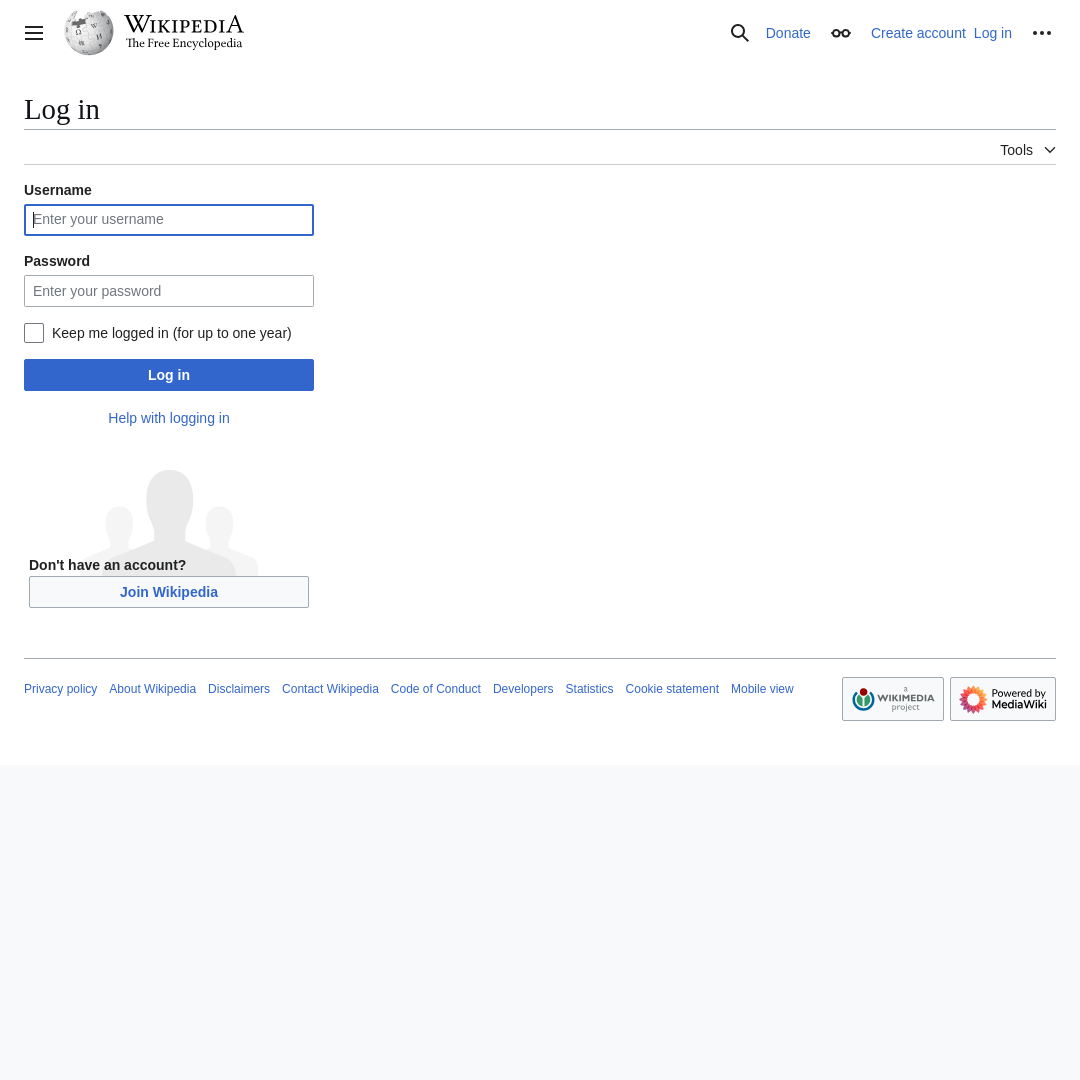

2024-10-30 09:10:36,590 - INFO - - The current screenshot shows the Wikipedia login page.
- The objective is to click on the "Log in" button.
- The "Log in" button is visible on the page.
- The previous instruction to click on the "Log in" button might have been misunderstood as it is already on the login page.

Next engine: COMPLETE
Instruction: [NONE]
2024-10-30 09:10:36,592 - INFO - Objective reached. Stopping...


ActionResult(instruction=None, code='from selenium import webdriver\nfrom selenium.webdriver.common.by import By\nfrom selenium.webdriver.chrome.options import Options\nfrom selenium.webdriver.common.keys import Keys\nfrom selenium.webdriver.common.action_chains import ActionChains\nfrom lavague.core.base_driver import JS_SETUP_GET_EVENTS\n\nelse:\nchrome_options = Options()\nchrome_options.add_argument("--headless=new")\nuser_agent = "Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36"\nchrome_options.add_argument(f"user-agent={user_agent}")\nchrome_options.add_argument("--no-sandbox")\nchrome_options.page_load_strategy = "normal"\nchrome_options.add_argument("--disable-web-security")\nchrome_options.add_argument("--disable-site-isolation-trials")\nchrome_options.set_capability("goog:loggingPrefs", {"performance": "ALL"})\n\nchrome_options.add_experimental_option("debuggerAddress", "localhost:9223")\n)\n\n# 538: browserbase imple

In [7]:
from lavague.core.agents import WebAgent

agent = WebAgent(world_model, action_engine)

agent.get("https://en.wikipedia.com")
agent.run("Click on the Log in button", display=True)